In [9]:
from eval import analyze_model

import pandas as pd
import torch
from pmf import PMF
from lr import LogReg
import pickle

SEED = 42
K_FOLDS = 5
REPLACEMENT_LEVELS = [500, 1000]
LATENT_FACTORS = [1, 2]


In [27]:
df = pd.read_csv('data/men_data.csv')

from sklearn.model_selection import KFold
kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=SEED)

results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(df)):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    for replacement_level in REPLACEMENT_LEVELS:
        with open(f"models/lr/model_rl_{replacement_level}_fold_{fold}.pkl", 'rb') as f:
            lr_model = pickle.load(f)
        for num_factors in LATENT_FACTORS:
            results.append({
                'model_type': 'lr',
                'replacement_level': replacement_level,
                'num_factors': num_factors,
                'fold': fold,
                'train_results': analyze_model(lr_model, train),
                'test_results': analyze_model(lr_model, test)
            })

        for num_factors in LATENT_FACTORS:
            pmf_model = torch.load(f"models/pmf/model_rl_{replacement_level}_d_{num_factors}_fold_{fold}.pth")
            pmf_model.eval()
            results.append({
                'model_type': 'pmf',
                'replacement_level': replacement_level,
                'num_factors': num_factors,
                'fold': fold,
                'train_results': analyze_model(pmf_model, train),
                'test_results': analyze_model(pmf_model, test)
            })

results = pd.DataFrame(results)
results

,model_type,replacement_level,num_factors,fold,train_results,test_results
0,lr,500,1,0,"{'Accuracy': 0.5631669444918425, 'Log Loss': 0...","{'Accuracy': 0.5672809366304404, 'Log Loss': 0..."
1,lr,500,2,0,"{'Accuracy': 0.5631669444918425, 'Log Loss': 0...","{'Accuracy': 0.5672809366304404, 'Log Loss': 0..."
2,pmf,500,1,0,"{'Accuracy': 0.5690734639767939, 'Log Loss': 0...","{'Accuracy': 0.5627657898881714, 'Log Loss': 0..."
3,pmf,500,2,0,"{'Accuracy': 0.5986848149946842, 'Log Loss': 0...","{'Accuracy': 0.5863915577256261, 'Log Loss': 0..."
4,lr,1000,1,0,"{'Accuracy': 0.5546878076312232, 'Log Loss': 0...","{'Accuracy': 0.5579356329080695, 'Log Loss': 0..."
5,lr,1000,2,0,"{'Accuracy': 0.5546878076312232, 'Log Loss': 0...","{'Accuracy': 0.5579356329080695, 'Log Loss': 0..."
6,pmf,1000,1,0,"{'Accuracy': 0.5943271161746755, 'Log Loss': 0...","{'Accuracy': 0.5919567385940043, 'Log Loss': 0..."
7,pmf,1000,2,0,"{'Accuracy': 0.5776707312271122, 'Log Loss': 0...","{'Accuracy': 0.5720060901979315, 'Log Loss': 0..."
8,lr,500,1,1,"{'Accuracy': 0.5624975389502146, 'Log Loss': 0...","{'Accuracy': 0.5611907386990077, 'Log Loss': 0..."
9,lr,500,2,1,"{'Accuracy': 0.5624975389502146, 'Log Loss': 0...","{'Accuracy': 0.5611907386990077, 'Log Loss': 0..."


In [28]:
metrics = pd.concat([
    pd.concat(
        [
            results[['model_type', 'replacement_level', 'num_factors', 'fold']],
            results['train_results'].apply(pd.Series).assign(dataset = "train")
        ], axis = 1
    ),
    pd.concat(
        [
            results[['model_type', 'replacement_level', 'num_factors', 'fold']],
            results['test_results'].apply(pd.Series).assign(dataset = "test")
        ], axis = 1
    )
])

metrics

,model_type,replacement_level,num_factors,fold,Accuracy,Log Loss,Brier Score,F1 Score,ROC Score,dataset
0,lr,500,1,0,0.563167,0.660053,0.234401,0.446543,0.596870,train
1,lr,500,2,0,0.563167,0.660053,0.234401,0.446543,0.596870,train
2,pmf,500,1,0,0.569073,0.721714,0.255286,0.595712,0.601236,train
3,pmf,500,2,0,0.598685,0.715102,0.249335,0.617894,0.635873,train
4,lr,1000,1,0,0.554688,0.683440,0.245285,0.713568,0.516865,train
...,...,...,...,...,...,...,...,...,...,...
35,pmf,500,2,4,0.579439,0.737092,0.258508,0.594348,0.611329,test
36,lr,1000,1,4,0.552399,0.683564,0.245355,0.711672,0.517865,test
37,lr,1000,2,4,0.552399,0.683564,0.245355,0.711672,0.517865,test
38,pmf,1000,1,4,0.586212,0.682933,0.244907,0.615617,0.613773,test


c:\Users\ethan\Documents\boulder2vec\venv\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6 x 3 in image.
c:\Users\ethan\Documents\boulder2vec\venv\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: results/results.png


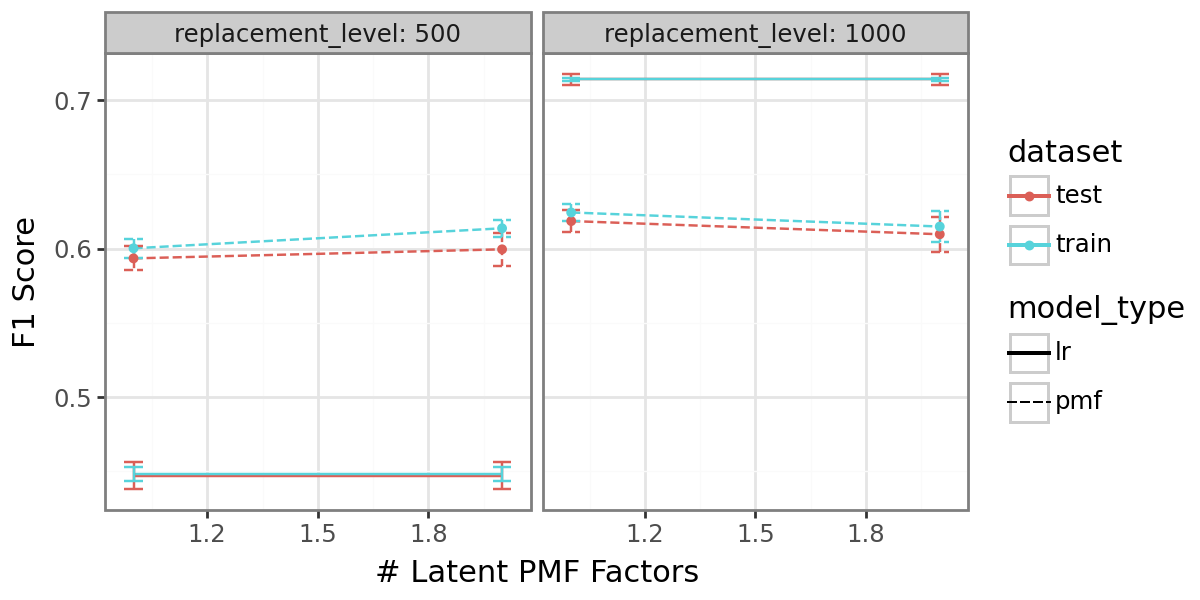

In [41]:
import plotnine
from plotnine import *

plot_data = (
    metrics
    .groupby(['model_type', 'replacement_level', 'num_factors', 'dataset'])
    ['F1 Score'].agg(['mean', 'std', 'size'])
    .reset_index()
    .assign(
        se = lambda d: d['std'] / d['size'].apply(np.sqrt),
        mean_err_min = lambda d: d['mean'] - 1.96 * d.se,
        mean_err_max = lambda d: d['mean'] + 1.96 * d.se
    )
)

plotnine.options.figure_size = (6, 3)
p = (
  plot_data
  .pipe(ggplot, aes(x = "num_factors", y = "mean", color = "dataset", linetype = "model_type")) +
  # Add horizontal lines for logistic regression
  # geom_hline(aes(yintercept = "mean", color = "dataset"), data = plot_data.query("model_type == 'lr'")) +
  # Add lines and points for PMF
  geom_line() +
  geom_errorbar(aes(ymin = "mean_err_min", ymax = "mean_err_max"), width = 0.05) +
  geom_point(size = 1, data = plot_data.query("model_type == 'pmf'")) +
  facet_wrap("~ replacement_level", labeller="label_both") +
  labs(x = "# Latent PMF Factors", y = "F1 Score") +
  theme_bw()
)

p.save("results/results.png")
p